In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("imdb_movies_shows.csv")

In [22]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [23]:
df.shape

(5806, 11)

In [24]:
df['type'].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

In [25]:
df['genres'].value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

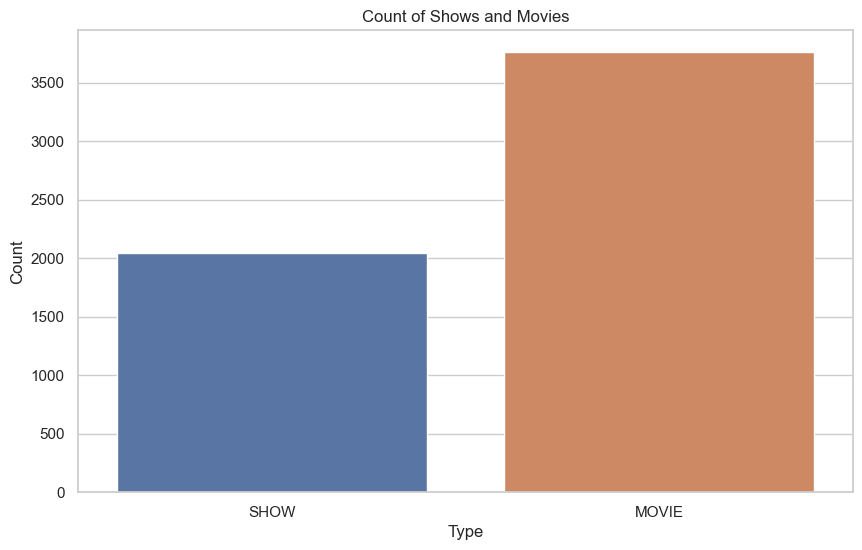

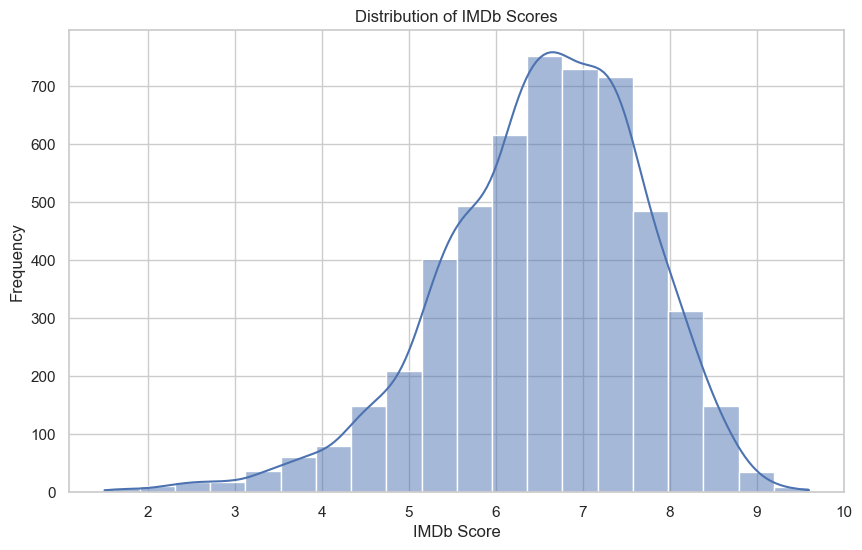

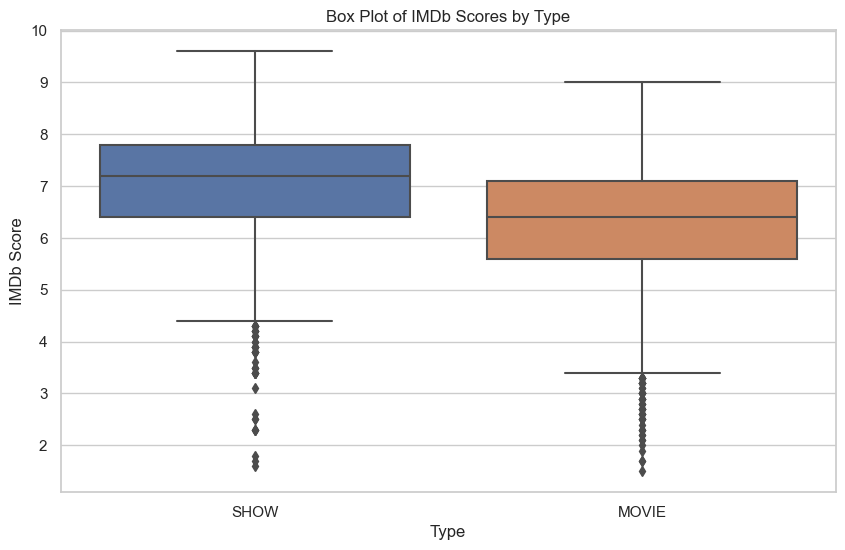

/var/folders/0g/2spwnb714c7bsvwssh433q680000gn/T/ipykernel_11070/3803340638.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


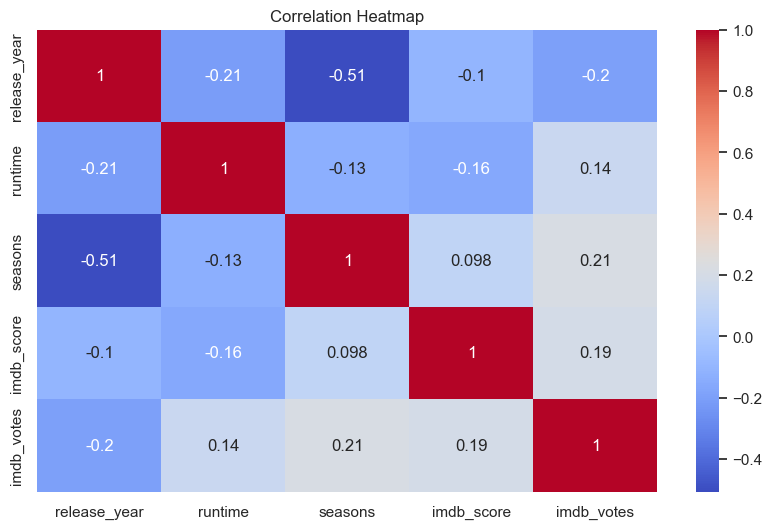

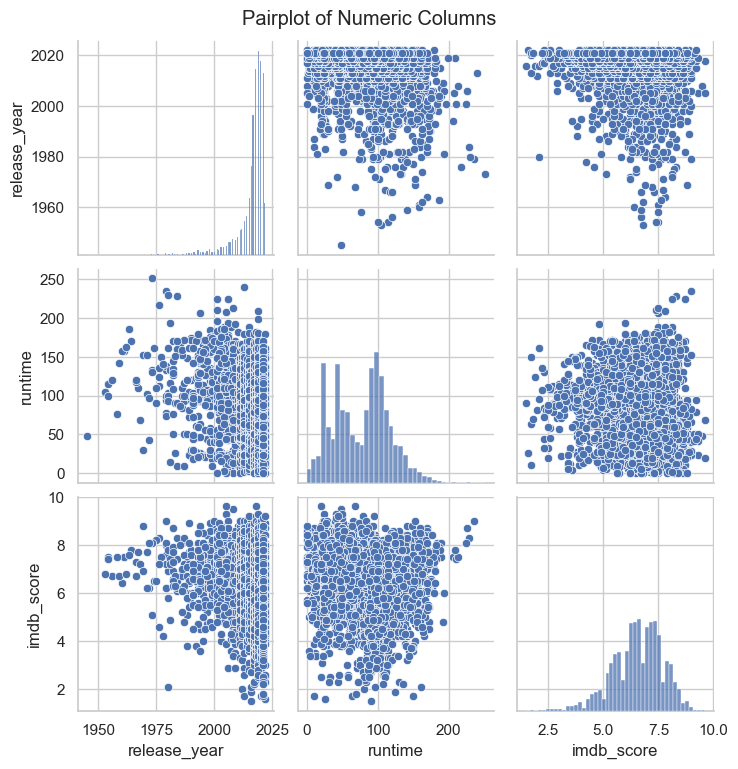

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Bar plot of the count of each 'type'
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Count of Shows and Movies')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Visualization 2: Distribution of IMDb scores
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Box plot of IMDb scores by 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='imdb_score', data=df)
plt.title('Box Plot of IMDb Scores by Type')
plt.xlabel('Type')
plt.ylabel('IMDb Score')
plt.show()

# Visualization 4: Heatmap of correlation between numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 5: Pairplot of numeric columns
sns.pairplot(df[['release_year', 'runtime', 'imdb_score']])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

In [31]:
df[['genres']]

,genres
0,['documentation']
1,"['crime', 'drama']"
2,"['comedy', 'fantasy']"
3,['comedy']
4,['horror']
...,...
5801,"['romance', 'drama']"
5802,"['music', 'documentation']"
5803,"['family', 'drama']"
5804,"['action', 'thriller']"


In [34]:
import ast

for i in range(len(df['genres'])):
    df['genres'][i] = ast.literal_eval(df['genres'][i])

print(df['genres'])

/var/folders/0g/2spwnb714c7bsvwssh433q680000gn/T/ipykernel_11070/1507534502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'][i] = ast.literal_eval(df['genres'][i])


0                   [documentation]
1                    [crime, drama]
2                 [comedy, fantasy]
3                          [comedy]
4                          [horror]
                   ...             
5801               [romance, drama]
5802         [music, documentation]
5803                [family, drama]
5804             [action, thriller]
5805    [family, comedy, animation]
Name: genres, Length: 5806, dtype: object


In [38]:
df['genres'] = [genre.strip("[]").replace("'", "").split(", ") for genre in df['genres']]

print(df['genres'])

AttributeError: 'list' object has no attribute 'strip'

In [39]:
df['genres'] = [ast.literal_eval(genre)[0] for genre in df['genres']]

print(df['genres'])

ValueError: malformed node or string: ['documentation']

In [41]:
df['genres'] = [ast.literal_eval(genre)[0] if len(ast.literal_eval(genre)) == 1 else ast.literal_eval(genre) for genre in df['genres']]

print(df['genres'])

ValueError: malformed node or string: ['documentation']

In [42]:
df['genres'] = [ast.literal_eval(genre)[0] if isinstance(ast.literal_eval(genre), list) else ast.literal_eval(genre) for genre in df['genres']]

print(df['genres'])

ValueError: malformed node or string: ['documentation']

In [43]:
# Custom function to convert string representation to list
def convert_to_list(entry):
    try:
        # Evaluate the string as a Python expression
        result = ast.literal_eval(entry)
        
        # If the result is a list, return it; otherwise, return a list containing the result
        return result if isinstance(result, list) else [result]
    except (SyntaxError, ValueError):
        # Handle the case where literal_eval fails (malformed node or string)
        return []

# Apply the custom function to each entry in the 'genres' column
df['genres'] = [item for sublist in [convert_to_list(entry) for entry in df['genres']] for item in sublist]

print(df['genres'])

ValueError: Length of values (0) does not match length of index (5806)